In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [64]:
df=pd.read_csv('Day3.csv')
df

,Cust ID,Card Num,Amount,Currency,Card Type,Trans Mode,Fraudlabel
0,1,198765,285.88,INR,MasterCard,Online,1
1,2,198766,1777.32,EUR,American Express,Online,1
2,3,198767,3939.01,USD,Visa,In-Person,1
3,4,198768,376.44,USD,Visa,In-Person,0
4,5,198769,1687.33,INR,MasterCard,Online,1
...,...,...,...,...,...,...,...
3995,3996,202760,4542.61,INR,Visa,Online,1
3996,3997,202761,4828.59,INR,Visa,In-Person,0
3997,3998,202762,957.30,EUR,American Express,In-Person,1
3998,3999,202763,4269.58,USD,MasterCard,Online,0


In [65]:
df.shape

(4000, 7)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Cust ID     4000 non-null   int64  
 1   Card Num    4000 non-null   int64  
 2   Amount      4000 non-null   float64
 3   Currency    4000 non-null   object 
 4   Card Type   4000 non-null   object 
 5   Trans Mode  4000 non-null   object 
 6   Fraudlabel  4000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 218.9+ KB


In [67]:
#Fraud count
cd=df['Fraudlabel'].value_counts()
cd

1    2005
0    1995
Name: Fraudlabel, dtype: int64

In [68]:
imbalance_ratio = cd[1] / cd[0]
print("Imbalance Ratio (Fraudulent to Non-Fraudulent):", imbalance_ratio)

Imbalance Ratio (Fraudulent to Non-Fraudulent): 1.005012531328321


In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cust ID,4000.0,2000.500000,1154.844867,1.00,1000.7500,2000.500,3000.2500,4000.0
Card Num,4000.0,200764.500000,1154.844867,198765.00,199764.7500,200764.500,201764.2500,202764.0
Amount,4000.0,2504.591608,1460.663169,1.09,1225.1525,2520.815,3768.0675,4996.7
Fraudlabel,4000.0,0.501250,0.500061,0.00,0.0000,1.000,1.0000,1.0


In [70]:
df.isna().sum()

Cust ID       0
Card Num      0
Amount        0
Currency      0
Card Type     0
Trans Mode    0
Fraudlabel    0
dtype: int64

In [71]:
#string conversion
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Currency']=le.fit_transform(df['Currency'])
df.head()


,Cust ID,Card Num,Amount,Currency,Card Type,Trans Mode,Fraudlabel
0,1,198765,285.88,1,MasterCard,Online,1
1,2,198766,1777.32,0,American Express,Online,1
2,3,198767,3939.01,2,Visa,In-Person,1
3,4,198768,376.44,2,Visa,In-Person,0
4,5,198769,1687.33,1,MasterCard,Online,1


In [72]:
df['Card Type']=le.fit_transform(df['Card Type'])
df['Trans Mode']=le.fit_transform(df['Trans Mode'])
df.head()

,Cust ID,Card Num,Amount,Currency,Card Type,Trans Mode,Fraudlabel
0,1,198765,285.88,1,1,1,1
1,2,198766,1777.32,0,0,1,1
2,3,198767,3939.01,2,2,0,1
3,4,198768,376.44,2,2,0,0
4,5,198769,1687.33,1,1,1,1


array([[<Axes: title={'center': 'Cust ID'}>,
        <Axes: title={'center': 'Card Num'}>,
        <Axes: title={'center': 'Amount'}>],
       [<Axes: title={'center': 'Currency'}>,
        <Axes: title={'center': 'Card Type'}>,
        <Axes: title={'center': 'Trans Mode'}>],
       [<Axes: title={'center': 'Fraudlabel'}>, <Axes: >, <Axes: >]],
      dtype=object)

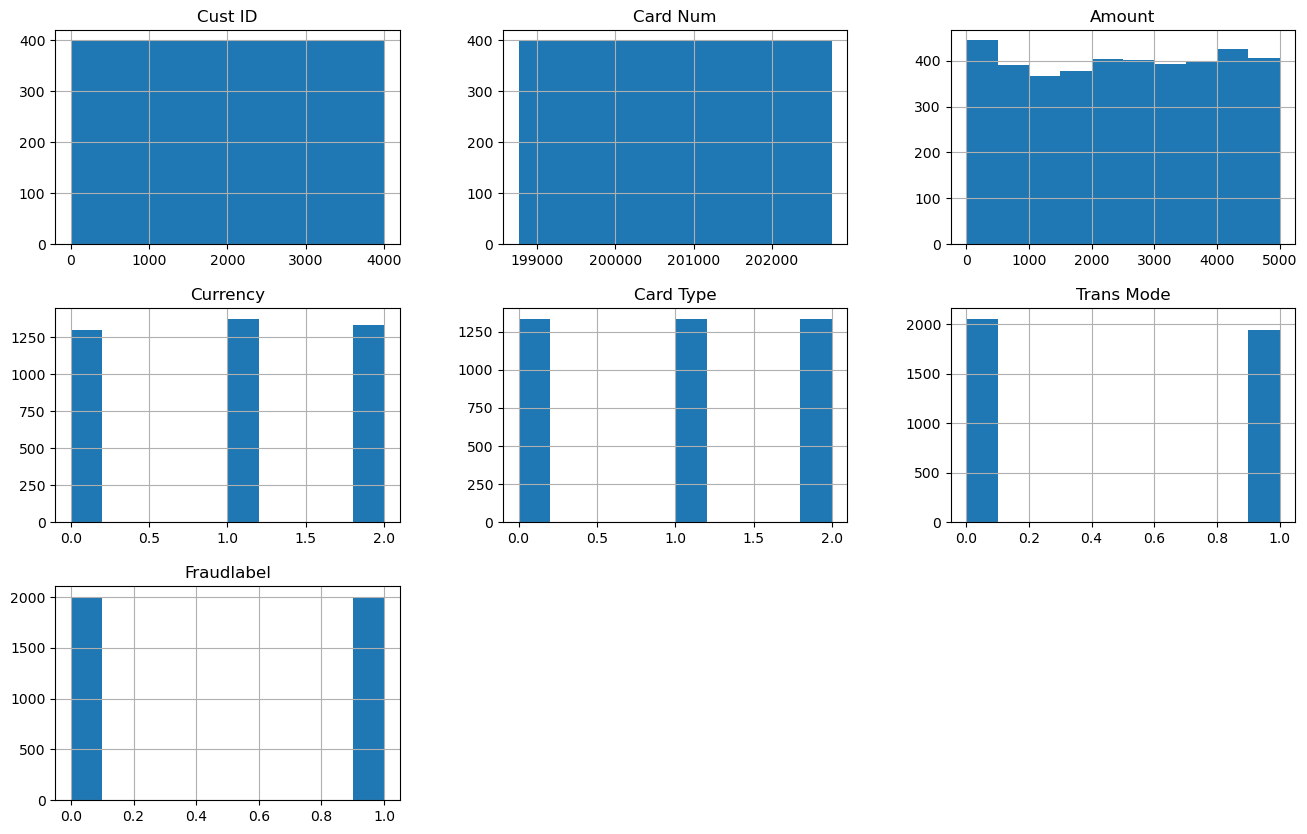

In [73]:
df.hist(figsize=(16,10))

In [74]:
x=df.iloc[:,:-1]
x.head()

,Cust ID,Card Num,Amount,Currency,Card Type,Trans Mode
0,1,198765,285.88,1,1,1
1,2,198766,1777.32,0,0,1
2,3,198767,3939.01,2,2,0
3,4,198768,376.44,2,2,0
4,5,198769,1687.33,1,1,1


In [75]:
y=df.iloc[:,-1:]
y.head(3)

,Fraudlabel
0,1
1,1
2,1


In [76]:
#splitting of training and testing data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
print('******************Training Data shape***************\n')
print('Training data-x-Shape:\t',xtrain.shape)
print()
print('Training data-y-Shape:\t',ytrain.shape)
print()
print('******************Testing Data shape*****************\n')
print('Testing data(x-Input) shape:\t',xtest.shape)
print()
print('Testing data(y-outcome)shape:\t',ytest.shape)

******************Training Data shape***************

Training data-x-Shape:	 (3200, 6)

Training data-y-Shape:	 (3200, 1)

******************Testing Data shape*****************

Testing data(x-Input) shape:	 (800, 6)

Testing data(y-outcome)shape:	 (800, 1)


In [77]:
#invoke the log reg algorithm from sklearn
log_reg=LogisticRegression(solver='liblinear',verbose=2)
print('********************Logistic Regression**********************')
#train the model
print("Training Started.......\n")
print()
log_reg.fit(xtrain,ytrain)
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred=log_reg.predict(xtest)
print('Predicted Class Labels are: \n',ypred)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred))

********************Logistic Regression**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1
 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
#performance measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


print('*******************Performance Measures for Logistic Regression*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n',classification_report(ytest,ypred))
print()
print('Precision Score:\t',precision_score(ytest,ypred))
print()
print('Recall Score:\t',recall_score(ytest,ypred))
print()
print('F1 Score:\t',f1_score(ytest,ypred))

*******************Performance Measures for Logistic Regression*************
Accuracy Score:	 0.50125

Confusion Matrix:
 [[ 76 332]
 [ 67 325]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.19      0.28       408
           1       0.49      0.83      0.62       392

    accuracy                           0.50       800
   macro avg       0.51      0.51      0.45       800
weighted avg       0.51      0.50      0.44       800


Precision Score:	 0.4946727549467275

Recall Score:	 0.8290816326530612

F1 Score:	 0.6196377502383222


In [79]:
log_reg.classes_

array([0, 1], dtype=int64)

In [80]:
log_reg.coef_

array([[ 4.31563025e-06,  1.73225048e-07, -1.08110730e-05,
         1.31629255e-08,  9.03675935e-08,  2.62737928e-08]])

In [81]:
log_reg.decision_function

<bound method LinearClassifierMixin.decision_function of LogisticRegression(solver='liblinear', verbose=2)>

In [82]:
log_reg.dual


False

In [83]:
log_reg.feature_names_in_

array(['Cust ID', 'Card Num', 'Amount', 'Currency', 'Card Type',
       'Trans Mode'], dtype=object)

In [84]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 2,
 'warm_start': False}

In [85]:
#roc curve
y_probs=log_reg.predict_proba(xtest)[:,1]
y_probs

array([0.50692077, 0.5078872 , 0.50464792, 0.49964624, 0.51098758,
       0.50328961, 0.50617498, 0.5108021 , 0.50776252, 0.50580255,
       0.50308493, 0.50503585, 0.49836412, 0.5044391 , 0.50271337,
       0.5043229 , 0.50538814, 0.50242517, 0.50582374, 0.50878912,
       0.49564812, 0.51012526, 0.50488323, 0.50375851, 0.50514223,
       0.50657272, 0.50585104, 0.50197986, 0.51059773, 0.5062238 ,
       0.50495408, 0.50619876, 0.50134188, 0.50116552, 0.49967686,
       0.50454835, 0.49839965, 0.50013921, 0.50956461, 0.50976494,
       0.49738953, 0.50917144, 0.5065222 , 0.50251267, 0.51047679,
       0.50818708, 0.50128411, 0.50485767, 0.50365598, 0.49681974,
       0.50002348, 0.50384276, 0.49836257, 0.50267068, 0.49977705,
       0.50574812, 0.50480226, 0.50716566, 0.49941412, 0.5034473 ,
       0.50491499, 0.50011563, 0.49859158, 0.50233536, 0.5041697 ,
       0.50104897, 0.50476091, 0.5119711 , 0.50740697, 0.50365132,
       0.5101516 , 0.50237586, 0.50244392, 0.50970436, 0.50118

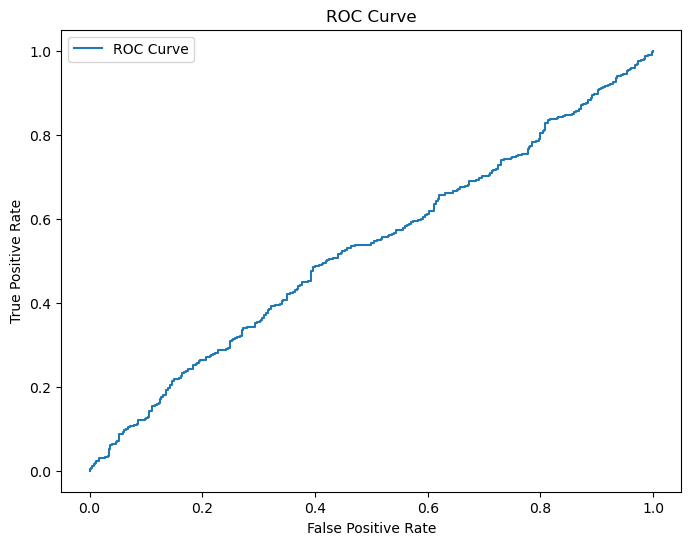

In [86]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

#Calculate ROC & AUC
fpr,tpr,thresholds=roc_curve(ytest,y_probs)
roc_auc=auc(fpr,tpr)

#plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [87]:
#Area 
roc_auc

0.5297431472589036

In [88]:
cm=confusion_matrix(ytest,ypred)
cm

array([[ 76, 332],
       [ 67, 325]], dtype=int64)

In [89]:
#feature engineering
#Scaling the model
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)

In [90]:
sc_x.shape

(4000, 6)

In [91]:
sc_x[0]

array([-1.73161785, -1.73161785, -1.51916544, -0.01018455,  0.        ,
        1.02943297])

In [92]:
sc_train_x=sc.fit_transform(xtrain)
sc_train_x

array([[-1.44436413e+00, -1.44436413e+00,  2.09463690e-01,
         1.24130263e+00, -2.29819887e-03, -9.56567272e-01],
       [ 1.10550073e+00,  1.10550073e+00, -9.38475693e-01,
         1.24130263e+00,  1.22340786e+00, -9.56567272e-01],
       [-3.14545957e-01, -3.14545957e-01, -3.40880691e-01,
         1.24130263e+00, -2.29819887e-03, -9.56567272e-01],
       ...,
       [-7.52801820e-02, -7.52801820e-02, -1.09774217e+00,
         1.54969118e-03, -2.29819887e-03, -9.56567272e-01],
       [-1.65858042e+00, -1.65858042e+00, -5.14800579e-01,
         1.54969118e-03,  1.22340786e+00,  1.04540478e+00],
       [ 7.96269156e-01,  7.96269156e-01,  6.27872839e-01,
         1.24130263e+00,  1.22340786e+00,  1.04540478e+00]])

In [93]:
sc_test_x=sc.fit_transform(xtest)
sc_test_x

array([[-1.5691678 , -1.5691678 , -1.23355164, -0.05622665, -1.21485146,
         0.96801137],
       [-1.50265131, -1.50265131, -1.46157953, -1.27193806,  1.23321194,
         0.96801137],
       [ 0.39919522,  0.39919522,  0.00760876, -0.05622665,  0.00918024,
         0.96801137],
       ...,
       [-1.65843993, -1.65843993,  1.46100683, -0.05622665, -1.21485146,
        -1.03304572],
       [-0.72020731, -0.72020731, -0.744363  , -1.27193806,  0.00918024,
         0.96801137],
       [-0.65631647, -0.65631647,  1.26977613, -0.05622665,  0.00918024,
         0.96801137]])

In [94]:
#after scaling
#Logistic Regression Model
log_reg_sc=LogisticRegression(solver='liblinear',verbose=2)
print('********************Logistic Regression**********************')
#train the model
print("Training Started.......\n")
print()
log_reg_sc.fit(sc_train_x,ytrain)
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred=log_reg_sc.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred))

********************Logistic Regression**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1
 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1
 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0
 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1
 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
#Performance Measures for log reg model which is built after scaling
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


print('*******************Performance Measures for Logistic Regression*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n',classification_report(ytest,ypred))
print()
print('Precision Score:\t',precision_score(ytest,ypred))
print()
print('Recall Score:\t',recall_score(ytest,ypred))
print()
print('F1 Score:\t',f1_score(ytest,ypred))

*******************Performance Measures for Logistic Regression*************
Accuracy Score:	 0.54625

Confusion Matrix:
 [[192 216]
 [147 245]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.47      0.51       408
           1       0.53      0.62      0.57       392

    accuracy                           0.55       800
   macro avg       0.55      0.55      0.54       800
weighted avg       0.55      0.55      0.54       800


Precision Score:	 0.5314533622559653

Recall Score:	 0.625

F1 Score:	 0.5744431418522861


In [96]:
from imblearn.over_sampling import RandomOverSampler

In [97]:
ros=RandomOverSampler(random_state=42)
ros_x,ros_y=ros.fit_resample(sc_train_x,ytrain)

In [98]:
log_reg_ros=LogisticRegression(solver='liblinear',verbose=2)
print('********************Logistic Regression with oversampling data(RandomOverSampler)**********************')
#train the model
print("Training Started.......\n")
print()
log_reg_ros.fit(ros_x,ros_y)
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred_ros=log_reg_ros.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_ros)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred_ros))

********************Logistic Regression with oversampling data(RandomOverSampler)**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0
 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1
 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1
 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0
 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [99]:
#Performance Measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


print('*******************Performance Measures for Logistic Regression after oversampling*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred_ros))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_ros))
print()
print('Classification Report:\n',classification_report(ytest,ypred_ros))
print()
print('Precision Score:\t',precision_score(ytest,ypred_ros))
print()
print('Recall Score:\t',recall_score(ytest,ypred_ros))
print()
print('F1 Score:\t',f1_score(ytest,ypred_ros))

*******************Performance Measures for Logistic Regression after oversampling*************
Accuracy Score:	 0.5425

Confusion Matrix:
 [[220 188]
 [178 214]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.54      0.55       408
           1       0.53      0.55      0.54       392

    accuracy                           0.54       800
   macro avg       0.54      0.54      0.54       800
weighted avg       0.54      0.54      0.54       800


Precision Score:	 0.5323383084577115

Recall Score:	 0.5459183673469388

F1 Score:	 0.5390428211586903


In [100]:
from imblearn.over_sampling import SMOTE

In [101]:
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the training data
sm_train_x, sm_train_y = smote.fit_resample(sc_train_x, ytrain)

In [102]:
#Build log reg model with Oversampling data(SMOTE)
log_reg_sm=LogisticRegression(solver='liblinear',verbose=2)
print('********************Logistic Regression with oversampling data(SMOTE)**********************')
#train the model
print("Training Started.......\n")
print()
log_reg_sm.fit(sm_train_x,sm_train_y)
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred_sm=log_reg_sm.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_sm)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred_sm))

********************Logistic Regression with oversampling data(SMOTE)**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0
 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1
 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1
 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0
 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1
 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [103]:
#Performance Measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


print('*******************Performance Measures of log reg after oversampling*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred_sm))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_sm))
print()
print('Classification Report:\n',classification_report(ytest,ypred_sm))
print()
print('Precision Score:\t',precision_score(ytest,ypred_sm))
print()
print('Recall Score:\t',recall_score(ytest,ypred_sm))
print()
print('F1 Score:\t',f1_score(ytest,ypred_sm))

*******************Performance Measures of log reg after oversampling*************
Accuracy Score:	 0.55125

Confusion Matrix:
 [[223 185]
 [174 218]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.55      0.55       408
           1       0.54      0.56      0.55       392

    accuracy                           0.55       800
   macro avg       0.55      0.55      0.55       800
weighted avg       0.55      0.55      0.55       800


Precision Score:	 0.5409429280397022

Recall Score:	 0.5561224489795918

F1 Score:	 0.5484276729559748


In [104]:
#undersampling
from imblearn.under_sampling import RandomUnderSampler

In [105]:
rus = RandomUnderSampler(random_state=42)

# Fit and resample the training data
rus_train_x, rus_train_y = rus.fit_resample(sc_train_x, ytrain)
print(rus_train_x,rus_train_y)

[[-1.44436413e+00 -1.44436413e+00  2.09463690e-01  1.24130263e+00
  -2.29819887e-03 -9.56567272e-01]
 [-3.14545957e-01 -3.14545957e-01 -3.40880691e-01  1.24130263e+00
  -2.29819887e-03 -9.56567272e-01]
 [-4.26836753e-01 -4.26836753e-01  1.34345133e+00  1.24130263e+00
  -1.22800426e+00 -9.56567272e-01]
 ...
 [-3.75010232e-01 -3.75010232e-01 -1.05887758e+00  1.54969118e-03
  -2.29819887e-03 -9.56567272e-01]
 [ 1.44841955e+00  1.44841955e+00 -7.31529420e-01  1.54969118e-03
   1.22340786e+00  1.04540478e+00]
 [-1.63698603e+00 -1.63698603e+00 -5.13308669e-01  1.54969118e-03
  -2.29819887e-03 -9.56567272e-01]]       Fraudlabel
0              0
1              0
2              0
3              0
4              0
...          ...
3169           1
3170           1
3171           1
3172           1
3173           1

[3174 rows x 1 columns]


In [106]:
log_reg_rus=LogisticRegression(solver='liblinear',verbose=2)
print('********************Logistic Regression with undersampling data(RandomUnderSampler)**********************')
#train the model
print("Training Started.......\n")
print()
log_reg_rus.fit(rus_train_x,rus_train_y)
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred_rus=log_reg_rus.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_rus)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred_rus))

********************Logistic Regression with undersampling data(RandomUnderSampler)**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0
 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1
 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1
 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0
 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 1 0 0 1 0 1 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
#Performance Measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


print('*******************Performance Measures after undersampling*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred_rus))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_rus))
print()
print('Classification Report:\n',classification_report(ytest,ypred_rus))
print()
print('Precision Score:\t',precision_score(ytest,ypred_rus))
print()
print('Recall Score:\t',recall_score(ytest,ypred_rus))
print()
print('F1 Score:\t',f1_score(ytest,ypred_rus))


*******************Performance Measures after undersampling*************
Accuracy Score:	 0.5425

Confusion Matrix:
 [[221 187]
 [179 213]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.54      0.55       408
           1       0.53      0.54      0.54       392

    accuracy                           0.54       800
   macro avg       0.54      0.54      0.54       800
weighted avg       0.54      0.54      0.54       800


Precision Score:	 0.5325

Recall Score:	 0.5433673469387755

F1 Score:	 0.5378787878787878
